### Coarse Tip Clearance Test Objective


### Procedure
- Initiate sweep from 30-100% throttle in increments of 5%, holding each throttle for 2 seconds.
- At each throttle step, allow ~0.5s for transient behaviour to settle and then average over the remaining data (~250 samples) to produce a single DC measurement for thrust, power, rpm, etc. at each point in the sweep.
- Repeat experiment at least once for each aerodynamic configuration, disassembling and reassembling between tests to ensure repeatability.

### Coarse Tip Clearance Test Configurations
| Duct Inner Diameter   | Propeller Diameter | Static Tip Clearance | Clearance to Height Ratio (%) |
|-                      |-                   |-                     |-                              |
| 137 mm                | 5 in / 127 mm      | 5 mm                 | 71.4 %                        |
| 133 mm                | 5 in / 127 mm      | 3 mm                 | 42.9 %                        |
| 129 mm                | 5 in / 127 mm      | 1 mm                 | 14.3 %                        |

### Hypothesis
- As tip clearance decreases, we expect thrust to electrical power efficiency (kgf/W) to increase.
- We expect all three 3D printed ducts to consume more power and produce less thrust relative to an equivalent propeller in open air. This is because the tip clearance to blade height ratio is too high for the duct to prevent the formation of blade tip vortices. These vortices are trapped by the duct rather than diffusing into open air, resulting in additional power loss.  

In [1]:
from runner import test_run, TestPlan, TestStep
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Specify Test Plan
Initialize a test plan object which sweeps from 0 to 100% throttle in increments of 5%, holding at each step for 2 seconds

In [2]:
# 1. Create a test plan consisting of steps.
step_duration_ms = 2_000
step_range = np.arange(5, 101, 5)

steps = [
    TestStep(bottom_throttle=i, top_throttle=i, duration_ms=step_duration_ms)
    for i in step_range
]
plan = TestPlan("test", steps=steps)

plan

TestPlan(name='test', steps=[TestStep(duration_ms=2000, top_throttle=5, bottom_throttle=5, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=10, bottom_throttle=10, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=15, bottom_throttle=15, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=20, bottom_throttle=20, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=25, bottom_throttle=25, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=30, bottom_throttle=30, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=35, bottom_throttle=35, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=40, bottom_throttle=40, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=45, bottom_throttle=45, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=50, bottom_throttle=50, pitch_ang

In [3]:
print(plan)

TestPlan(name='test', steps=[TestStep(duration_ms=2000, top_throttle=5, bottom_throttle=5, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=10, bottom_throttle=10, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=15, bottom_throttle=15, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=20, bottom_throttle=20, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=25, bottom_throttle=25, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=30, bottom_throttle=30, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=35, bottom_throttle=35, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=40, bottom_throttle=40, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=45, bottom_throttle=45, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=50, bottom_throttle=50, pitch_ang

### Execute Tests

In [4]:
# Initialize short thrust test to validate propeller mounting direction after changing props
test_duration_ms = 2000
mount_test_throttle = 10
perform_mounting_test = True

mount_test_plan = TestPlan("test", steps=[TestStep(bottom_throttle=mount_test_throttle, top_throttle=mount_test_throttle, duration_ms=test_duration_ms)])

In [5]:
### Execute optional mounting test
if (perform_mounting_test):
    try:
        test_run(filename=None, plan=mount_test_plan)
    except Exception as e:
        print(e)

could not open port 'COM9': FileNotFoundError(2, 'The system cannot find the file specified.', None, 2)


In [53]:
test_directory = Path("../test_data/coarse_tip_clearance/")

In [130]:
data_dict = {}

data_dict["1mm Coarse Tip Clearance - Lead Acid Battery"] = test_run(
    filename=test_directory / "test_5in_6blade_1mm_pb_0.csv", plan=plan
)
# data_dict["test_5in_6blade_1mm_pb_1"] = test_run(
#     filename=test_directory / "test_5in_6blade_1mm_pb_1.csv", plan=plan
# )
data_dict["1mm Coarse Tip Clearance - 4S LiPo Battery"] = test_run(
    filename=test_directory / "test_5in_6blade_1000um_1.csv", plan=plan
)
# data_dict["test_5in_6blade_1000um_1"] = test_run(
#     filename=test_directory / "test_5in_6blade_1000um_1.csv", plan=plan
# )
# data_dict["test_5in_6blade_1mm_fine"] = test_run(
#     filename=test_directory / "test_5in_6blade_1mm_fine.csv", plan=plan
# )
data_dict["1mm Fine Tip Clearance - Binding"] = test_run(
    filename=test_directory / "test_5in_6blade_1mm_fine_pb.csv", plan=plan
)
data_dict["test_5in_6blade_0_5mm_fine_pb"] = test_run(
    filename=test_directory / "test_5in_6blade_0_5mm_fine_pb.csv", plan=plan
)
# data_dict["test_5in_6blade_1500um_0"] = test_run(
#     filename=test_directory / "test_5in_6blade_1500um_0.csv", plan=plan
# )
# data_dict["test_5in_6blade_1500um_1"] = test_run(
#     filename=test_directory / "test_5in_6blade_1500um_1.csv", plan=plan
# )
# data_dict["test_5in_6blade_3000um_0"] = test_run(
#     filename=test_directory / "test_5in_6blade_3000um_0.csv", plan=plan
# )
# data_dict["test_5in_6blade_3000um_1"] = test_run(
#     filename=test_directory / "test_5in_6blade_3000um_1.csv", plan=plan
# )
# data_dict["test_5in_6blade_open_air_recal_0"] = test_run(
#     filename="../test_data/open_air/test_5in_6blade_open_air_recal_0.csv", plan=plan
# )
# data_dict["test_5in_6blade_open_air_recal_1"] = test_run(
#     filename="../test_data/open_air/test_5in_6blade_open_air_recal_1.csv", plan=plan
# )
# data_dict["test_5in_6blade_open_air_shaved_0"] = test_run(
#     filename="../test_data/open_air/test_5in_6blade_open_air_shaved_0.csv", plan=plan
# )
# data_dict["test_5in_6blade_open_air_shaved_1"] = test_run(
#     filename="../test_data/open_air/test_5in_6blade_open_air_shaved_1.csv", plan=plan
# )
# data_dict["test_5in_6blade_open_air_shaved_low_soc"] = test_run(
#     filename="../test_data/open_air/test_5in_6blade_open_air_shaved_low_soc.csv", plan=plan
# )

Loading saved data
Loading saved data
Loading saved data
Loading saved data


### Data Analysis

In [131]:
# Aggregate test data
df_all = pd.concat(data_dict, names=["test_name"])
df_all

top_motor_rpm  \
test_name                                    time_ms                    
1mm Coarse Tip Clearance - Lead Acid Battery 0.313             1228.0   
                                             4.175                0.0   
                                             8.170                0.0   
                                             12.176               0.0   
                                             16.170               0.0   
...                                                               ...   
test_5in_6blade_0_5mm_fine_pb                41968.170         3242.0   
                                             41972.170         3014.0   
                                             41976.170         2771.0   
                                             41980.166         2542.0   
                                             41984.176         2357.0   

                                                        bottom_motor_rpm  \
test_name                                    time_ms                       
1mm Coarse Tip Clearance - Lead Acid Battery 0.313                1242.0   
                                             4.175                   0.0   
                                             8.170                   0.0   
                                             12.176                  0.0   
                                             16.170                  0.0   
...                                                                  ...   
test_5in_6blade_0_5mm_fine_pb                41968.170            3314.0   
                                             41972.170            3057.0   
                                             41976.170            2814.0   
                                             41980.166            2571.0   
                                             41984.176            2400.0   

                                                        batt_voltage_V  \
test_name                                    time_ms                     
1mm Coarse Tip Clearance - Lead Acid Battery 0.313              14.784   
                                             4.175              14.784   
                                             8.170              14.784   
                                             12.176             14.826   
                                             16.170             14.784   
...                                                                ...   
test_5in_6blade_0_5mm_fine_pb                41968.170          12.642   
                                             41972.170          12.621   
                                             41976.170          12.621   
                                             41980.166          12.621   
                                             41984.176          12.621   

                                                        batt_current_A  \
test_name                                    time_ms                     
1mm Coarse Tip Clearance - Lead Acid Battery 0.313               10.24   
                                             4.175               10.24   
                                             8.170               10.24   
                                             12.176              10.24   
                                             16.170              10.24   
...                                                                ...   
test_5in_6blade_0_5mm_fine_pb                41968.170           10.24   
                                             41972.170           10.24   
                                             41976.170           10.24   
                                             41980.166           10.24   
                                             41984.176           10.24   

                                                        top_current_A  \
test_name                                    time_ms                    
1mm Coarse Tip Clearance - Lead Acid Battery 

In [132]:
# Select single test to analyze closer
test_data_05 = df_all.loc["test_5in_6blade_0_5mm_fine_pb"]
test_data_1 = df_all.loc["1mm Fine Tip Clearance - Binding"]

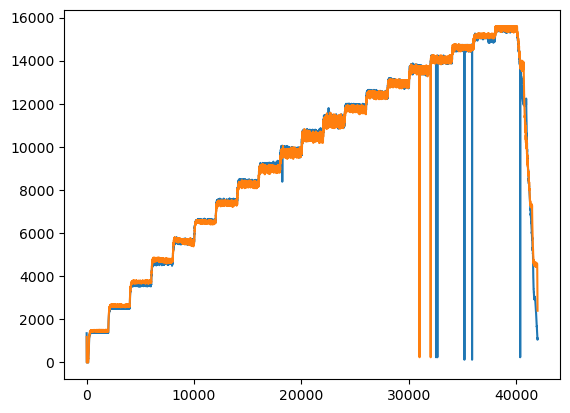

In [133]:
plt.plot(test_data_1["bottom_motor_rpm"])
plt.plot(test_data_05["bottom_motor_rpm"])

In [116]:
# Extract raw data from a loaded test csv
top_current_raw = test_data["top_current_A"]
bottom_current_raw = test_data["bottom_current_A"]
hall_current_raw = top_current_raw + bottom_current_raw

shunt_current_raw = test_data["batt_current_A"]
batt_voltage = test_data["batt_voltage_V"]

top_rpm = test_data["top_motor_rpm"]
bottom_rpm = test_data["bottom_motor_rpm"]

thrust_N = test_data["thrust_N"]
time_ms = test_data.index

# Determine mean sample rate
sample_rate_ms = np.mean(np.diff(time_ms))

In [117]:
# Generate buckets for averaging based on step duration defined in testing
stable_step_duration_ms = step_duration_ms / 2
transient_offset_ms = (
    500  # Ignore first 500 ms of each throttle step to allow transients to settle
)
step_start_times = np.arange(len(step_range)) * step_duration_ms


# Aggregate data for each throttle step
df_steps = (
    pd.concat(
        [
            df_all.loc[
                (
                    slice(None),
                    slice(
                        t_start + transient_offset_ms,
                        t_start + transient_offset_ms + stable_step_duration_ms,
                    ),
                ),
                :,
            ]
            for t_start in step_start_times
        ],
        keys=step_range,
        names=["throttle"],
    )
    .groupby(["test_name", "throttle"])
    .agg(["mean", "std"])
)

df_steps

top_motor_rpm  \
                                                               mean   
test_name                                    throttle                 
1mm Coarse Tip Clearance - 4S LiPo Battery   5             1742.820   
                                             10            3128.172   
                                             15            4401.624   
                                             20            5694.420   
                                             25            6801.876   
                                             30            7931.136   
                                             35            8972.060   
                                             40            9915.660   
                                             45           10952.136   
                                             50           11792.616   
                                             55           12612.728   
                                             60           13475.364   
                                             65           14308.244   
                                             70           15104.440   
                                             75           15749.736   
                                             80           16470.560   
                                             85           16958.488   
                                             90           17671.068   
                                             95           18219.668   
                                             100          18694.464   
1mm Coarse Tip Clearance - Lead Acid Battery 5             1531.824   
                                             10            2760.824   
                                             15            3906.780   
                                             20            5020.964   
                                             25            5929.716   
                                             30            6639.856   
                                             35            7295.984   
                                             40            8097.848   
                                             45            8827.512   
                                             50            9519.880   
                                             55           10261.728   
                                             60           10995.348   
                                             65           11614.660   
                                             70           12229.292   
                                             75           12852.728   
                                             80           13396.616   
                                             85           13960.544   
                                             90           14546.948   
                                             95           14989.544   
                                             100          15401.536   
test_5in_6blade_0_5mm_fine_pb                5             1431.932   
                                             10            2590.656   
                                             15            3684.008   
                                             20            4659.604   
                                             25            5540.292   
                                             30            6446.192   
                                             35            7247.252   
                                             40            8022.988   
                                             45            8764.776   
                                             50            9419.272   
                                             55           10130.216   
                                             60           10843.852   
                                             65           11467.756   
                                             70           12019.028   
       

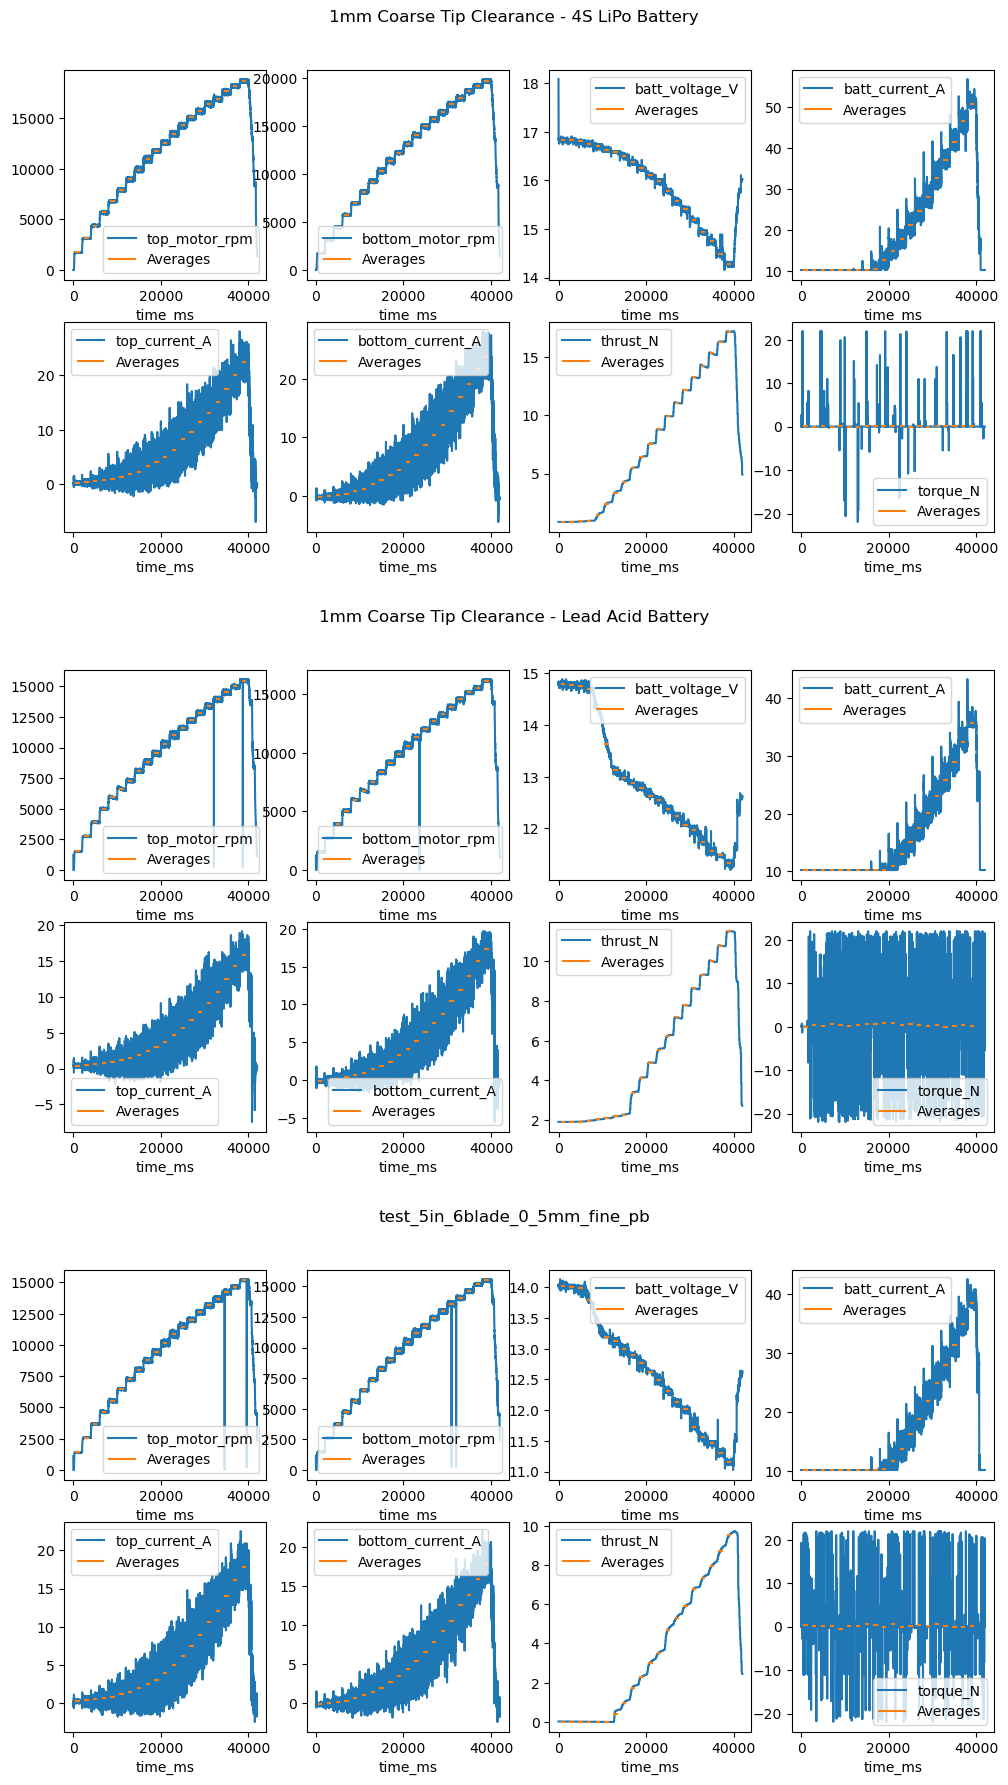

In [118]:
# Debug plots
fig = plt.figure(figsize=(12, 6*len(data_dict)))
subfigs = fig.subfigures(len(data_dict), 1)
if not isinstance(subfigs, np.ndarray):
    subfigs = np.array([subfigs])
for subfig, (n, grp) in zip(subfigs, df_all.groupby("test_name")):
    axs = subfig.subplots(2, 4)
    for ax, col in zip(axs.flat, grp):
        grp.reset_index("test_name").plot(ax=ax, y=col)
        ax.hlines(
            df_steps[col].loc[n]["mean"],
            step_start_times + transient_offset_ms,
            step_start_times + transient_offset_ms + stable_step_duration_ms,
            colors="C1",
            label="Averages",
        )
        ax.legend()
    subfig.suptitle(n)

In [119]:
thrust_mean_g = df_steps["thrust_N"]["mean"] / 9.81 * 1e3
thrust_g_err = df_steps["thrust_N"]["std"] / 9.81 * 1e3

hall_current_mean = df_steps["top_current_A"]["mean"] + df_steps["bottom_current_A"]["mean"]
hall_current_rel_err = (0.02294 * hall_current_mean + 0.3734) / hall_current_mean

batt_voltage_mean = df_steps["batt_voltage_V"]["mean"]
batt_voltage_rel_err = 0.025 / 14.8

shunt_current_mean = df_steps["batt_current_A"]["mean"]
shunt_power_mean = shunt_current_mean * batt_voltage_mean

batt_power_mean = hall_current_mean * batt_voltage_mean
batt_power_rel_err = np.sqrt(hall_current_rel_err**2 + batt_voltage_rel_err**2)

thrust_power_rel_err = np.sqrt((thrust_g_err / thrust_mean_g)**2 + batt_power_rel_err**2)
thrust_mean_g = thrust_mean_g * (thrust_mean_g > 0)

rpm_avg = 0.5*(df_steps["top_motor_rpm"]["mean"] + df_steps["bottom_motor_rpm"]["mean"])

df_thrust_power = pd.DataFrame(
    {
        "rpm_avg": rpm_avg,
        "thrust_mean_g": thrust_mean_g,
        "batt_power_mean": batt_power_mean,
        "shunt_power_mean": shunt_power_mean,
        "thrust_power_g_W": thrust_mean_g / batt_power_mean,
        "shunt_thrust_power_g_W": thrust_mean_g / shunt_power_mean,
        "batt_power_err": batt_power_rel_err * batt_power_mean,
        "thrust_g_err": thrust_g_err,
        "thrust_power_err": thrust_power_rel_err * (thrust_mean_g / batt_power_mean)
    }
)

In [120]:
# Set nominal required thrust constants. Used as a benchmark to define region of interest for our data.
hover_thrust_g = 750
payload_thrust_g = 1200

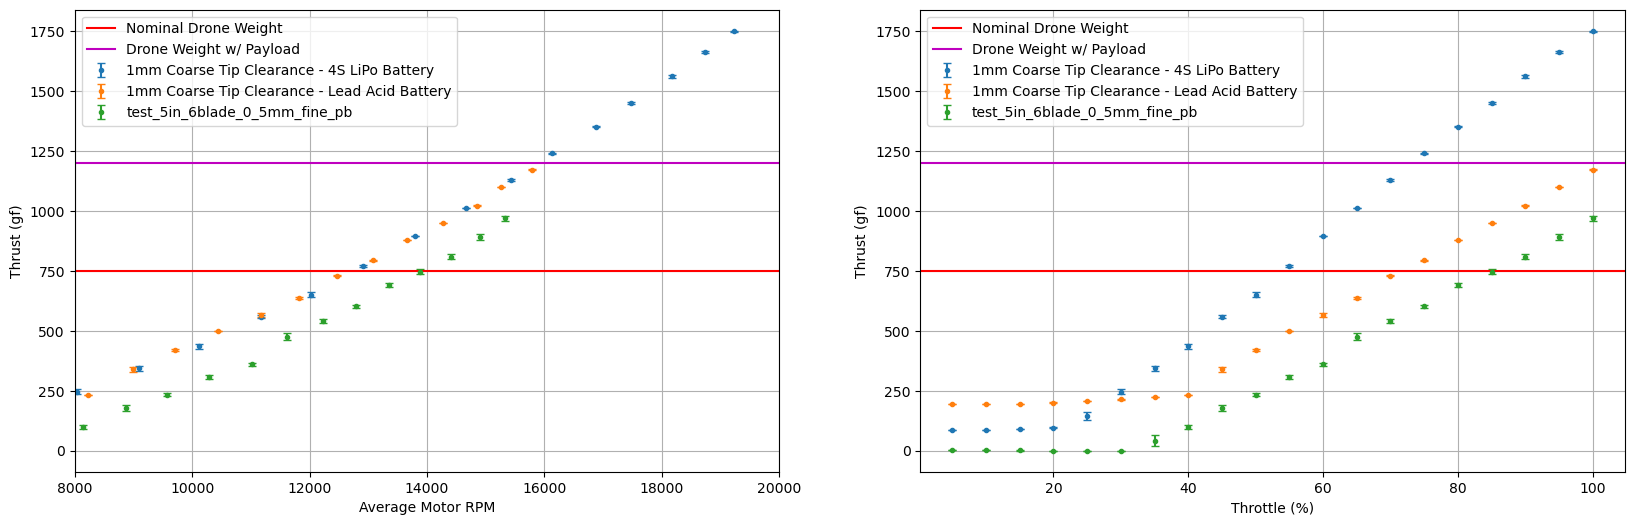

In [121]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    ax[0].errorbar(x="rpm_avg", y="thrust_mean_g", yerr="thrust_g_err", data=grp, label=n, fmt='o', capsize=3, markersize=3)
    ax[1].errorbar(x=grp.index.get_level_values("throttle"), y="thrust_mean_g", yerr="thrust_g_err", data=grp, label=n, fmt='o', capsize=3, markersize=3)

ax[0].set_xlabel("Average Motor RPM")
ax[0].set_ylabel("Thrust (gf)")
ax[0].set_xlim(8000, 20000)
ax[0].axhline(hover_thrust_g, color="r", label="Nominal Drone Weight")
ax[0].axhline(payload_thrust_g, color="m", label="Drone Weight w/ Payload")
ax[0].legend()
ax[0].grid()

ax[1].set_xlabel("Throttle (%)")
ax[1].set_ylabel("Thrust (gf)")
ax[1].axhline(hover_thrust_g, color="r", label="Nominal Drone Weight")
ax[1].axhline(payload_thrust_g, color="m", label="Drone Weight w/ Payload")
ax[1].legend()
ax[1].grid()

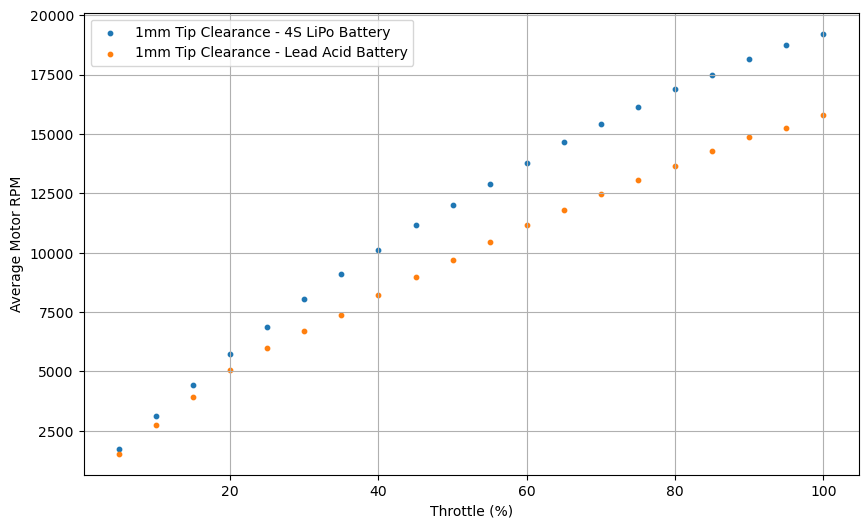

In [50]:
plt.figure(figsize=(10, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.scatter(x=grp.index.get_level_values("throttle"), y="rpm_avg", data=grp, label=n, s=10)
plt.xlabel("Throttle (%)")
plt.ylabel("Average Motor RPM")
plt.legend()
plt.grid()
plt.show()

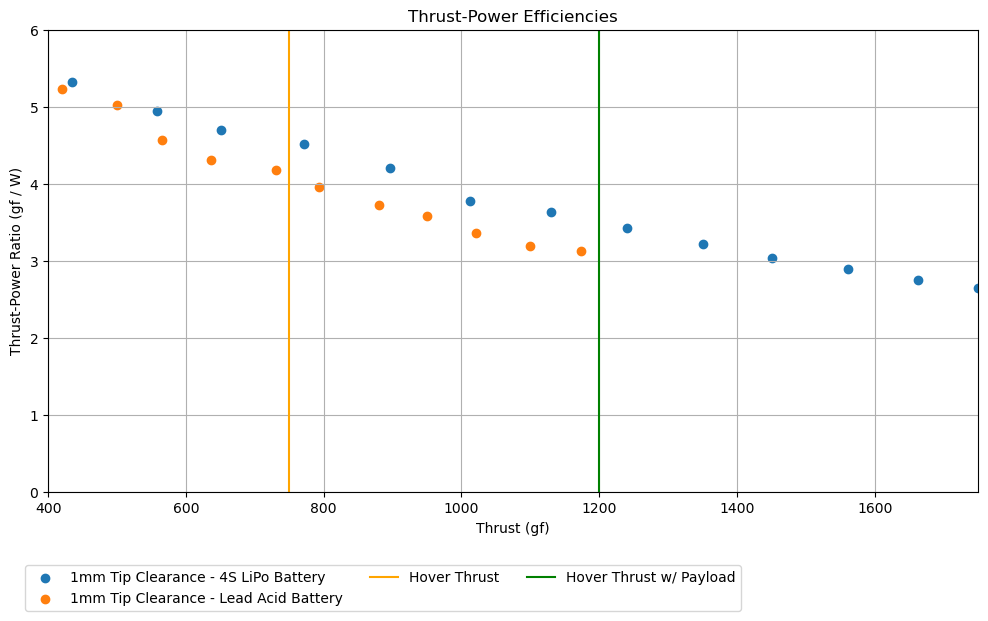

In [112]:
fig = plt.figure(figsize=(12, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.scatter(x="thrust_mean_g", y="thrust_power_g_W", data=grp, label=n)
plt.xlabel("Thrust (gf)")
plt.ylabel("Thrust-Power Ratio (gf / W)")
plt.xlim(400, 1750)
plt.ylim(0,6)
plt.axvline(hover_thrust_g, color="orange", label="Hover Thrust")
plt.axvline(payload_thrust_g, color="g", label="Hover Thrust w/ Payload")
plt.grid()
plt.legend(ncols=3, bbox_transform=fig.transFigure, bbox_to_anchor=(0.1, 0), loc="upper left")
plt.title("Thrust-Power Efficiencies")
plt.show()

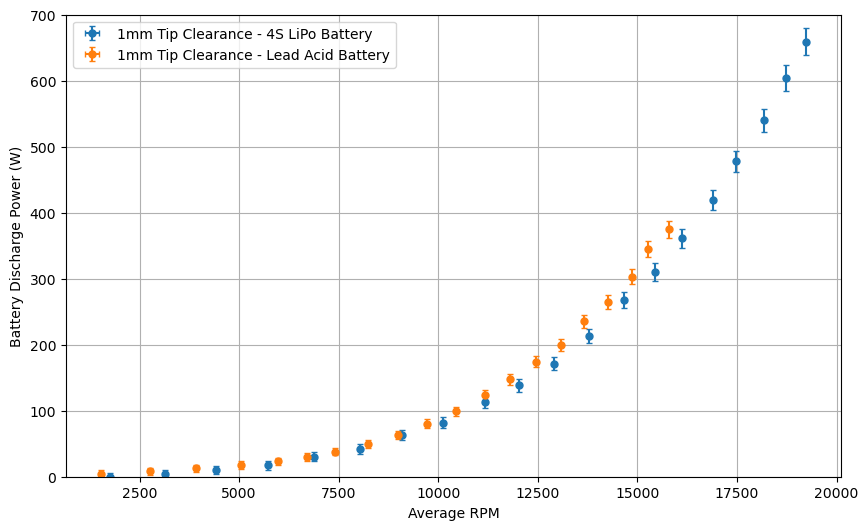

In [52]:
plt.figure(figsize=(10, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    #plt.scatter(x="thrust_mean_g", y="batt_power_mean", data=grp, label=n, s=20)
    plt.errorbar(x="rpm_avg", y="batt_power_mean", xerr="thrust_g_err", yerr="batt_power_err", label=n, data=grp, fmt='o', capsize=2, markersize=5)
plt.xlabel("Average RPM")
plt.ylabel("Battery Discharge Power (W)")
#plt.xlim(700, 1750)
plt.ylim(0, 700)
plt.grid()
#plt.axvline(hover_thrust_g, color="orange", label="Hover Thrust")
#plt.axvline(payload_thrust_g, color="g", label="Hover Thrust w/ Payload")
plt.legend()
plt.show()

In [19]:
characteristic_thrust = pd.Index(
    [hover_thrust_g, payload_thrust_g], name="thrust_mean_g"
)
# Interpolate power at hover and payload thrust
df_power_interp = (
    df_thrust_power.reset_index("throttle")
    .set_index("thrust_mean_g", append=True)
    .groupby("test_name")
    .apply(
        lambda g: (gd := g.droplevel("test_name").dropna())[
            ~gd.index.duplicated(keep="first")
        ]
        .reindex(gd.index.append(characteristic_thrust).unique())
        .sort_index()
        .interpolate(method="index", limit_area="inside")
        .loc[characteristic_thrust]
    )
)
df_power_interp

throttle       rpm_avg  \
test_name                     thrust_mean_g                            
test_5in_6blade_0_5mm_fine_pb 750.0          85.301288  13908.904714   
                              1200.0               NaN           NaN   
test_5in_6blade_1000um_0      750.0          53.762078  12604.169189   
                              1200.0         72.483014  15750.713160   
test_5in_6blade_1000um_1      750.0          54.113810  12748.089203   
                              1200.0         73.191222  15872.965462   
test_5in_6blade_1mm_fine      750.0          66.191483  14444.216207   
                              1200.0         90.483758  17591.227324   
test_5in_6blade_1mm_fine_pb   750.0          90.108900  14262.802184   
                              1200.0               NaN           NaN   
test_5in_6blade_1mm_pb_0      750.0          71.537493  12648.217828   
                              1200.0               NaN           NaN   
test_5in_6blade_1mm_pb_1      750.0          71.189301  12624.264499   
                              1200.0               NaN           NaN   

                                             batt_power_mean  \
test_name                     thrust_mean_g                    
test_5in_6blade_0_5mm_fine_pb 750.0               287.436063   
                              1200.0                     NaN   
test_5in_6blade_1000um_0      750.0               169.829458   
                              1200.0              335.068228   
test_5in_6blade_1000um_1      750.0               165.104814   
                              1200.0              342.817005   
test_5in_6blade_1mm_fine      750.0              1111.805371   
                              1200.0             1035.107823   
test_5in_6blade_1mm_fine_pb   750.0               305.156438   
                              1200.0                     NaN   
test_5in_6blade_1mm_pb_0      750.0               182.375862   
                              1200.0                     NaN   
test_5in_6blade_1mm_pb_1      750.0               182.583580   
                              1200.0                     NaN   

                                             shunt_power_mean  \
test_name                     thrust_mean_g                     
test_5in_6blade_0_5mm_fine_pb 750.0                326.534857   
                              1200.0                      NaN   
test_5in_6blade_1000um_0      750.0                233.567394   
                              1200.0               410.825844   
test_5in_6blade_1000um_1      750.0                232.815045   
                              1200.0               413.625631   
test_5in_6blade_1mm_fine      750.0                366.895908   
                              1200.0               651.022070   
test_5in_6blade_1mm_fine_pb   750.0                341.385471   
                              1200.0                      NaN   
test_5in_6blade_1mm_pb_0      750.0                223.174785   
                              1200.0                      NaN   
test_5in_6blade_1mm_pb_1      750.0                221.705792   
                              1200.0                      NaN   

                                             thrust_power_g_W  \
test_name                     thrust_mean_g                     
test_5in_6blade_0_5mm_fine_pb 750.0                  2.609928   
                              1200.0                      NaN   
test_5in_6blade_1000um_0      750.0                  4.432758   
                              1200.0                 3.591465   
test_5in_6blade_1000um_1      750.0                  4.548154   
                              1200.0                 3.507636   
test_5in_6blade_1mm_fine      750.0                  0.674790   
                              1200.0                 1.159420   
test_5in_6blade_1mm_fine_pb   750.0                  2.457850   
                              1200.0                      NaN   
test_5in_6blade_1mm_pb_0      750.0            

In [20]:
battery_capacity_Wh = 2 * 0.850 * 14.8
flight_time = pd.to_timedelta(
    battery_capacity_Wh / df_power_interp["batt_power_mean"], unit="h"
).rename("flight_time")
flight_time

test_name                      thrust_mean_g
test_5in_6blade_0_5mm_fine_pb  750.0           0 days 00:05:15.117035546
                               1200.0                                NaT
test_5in_6blade_1000um_0       750.0           0 days 00:08:53.335034214
                               1200.0          0 days 00:04:30.321064106
test_5in_6blade_1000um_1       750.0           0 days 00:09:08.596966399
                               1200.0          0 days 00:04:24.210930914
test_5in_6blade_1mm_fine       750.0           0 days 00:01:21.467496352
                               1200.0          0 days 00:01:27.503927572
test_5in_6blade_1mm_fine_pb    750.0           0 days 00:04:56.818250767
                               1200.0                                NaT
test_5in_6blade_1mm_pb_0       750.0           0 days 00:08:16.644672078
                               1200.0                                NaT
test_5in_6blade_1mm_pb_1       750.0           0 days 00:08:16.079658478
      

<Axes: title={'center': 'Flight time with a 4S 1700mAh battery pack'}, xlabel='Thrust (gf)', ylabel='Flight time (minutes)'>

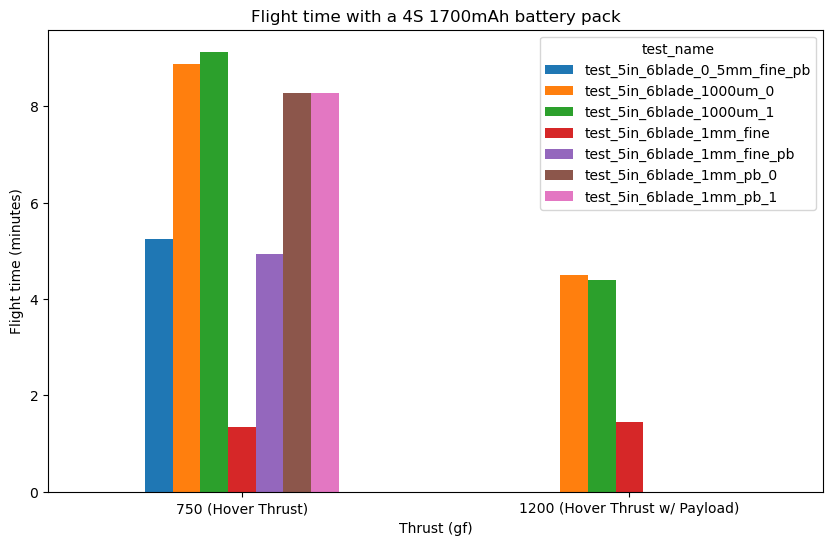

In [21]:
(
    flight_time.dt.seconds.unstack("test_name").rename(
        index={
            hover_thrust_g: f"{hover_thrust_g} (Hover Thrust)",
            payload_thrust_g: f"{payload_thrust_g} (Hover Thrust w/ Payload)",
        }
    )
    / 60
).plot.bar(
    title="Flight time with a 4S 1700mAh battery pack",
    xlabel="Thrust (gf)",
    ylabel="Flight time (minutes)",
    rot=0,
    figsize=(10, 6)
)